In [7]:
options(stringsAsFactors=F)
options(max.print=1000)
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggsci))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(circlize))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(corrplot))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(ggsignif))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(gep2pep))
options(bitmapType = 'cairo', device = 'png')

setwd('/psycl/g/mpsziller/lucia/CAD_UKBB/eQTL_PROJECT')
fold_notebook <- '/psycl/g/mpsziller/lucia/castom_cad_scz/jupyter_notebook/'
out_fold <- sprintf('%sCAD_clustering/', fold_notebook)
pathSEA_fold <- "OUTPUT_GTEx/predict_CAD/Liver/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering/update_corrPCs/pathSEA/"
pathSEA_file <- "OUTPUT_GTEx/predict_CAD/Liver/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering/update_corrPCs/pathSEA_corrPCs_tscoreClusterCases_featAssociation.txt"
drug_names_file <- "INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/pathSEA/treatment_names"
cl_res <- get(load("OUTPUT_GTEx/predict_CAD/Liver/200kb/CAD_GWAS_bin5e-2/UKBB/devgeno0.01_testdevgeno0/CAD_HARD_clustering/update_corrPCs/tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric.RData"))

cmap_fold <- "/psycl/g/mpsziller/lucia/refData/Cmap_MSigDB_v6.1_PEPs"
pathCluster_file <- sprintf("%s../pathOriginal_filtJS0.2_corrPCs_tscoreClusterCases_featAssociation.RData", pathSEA_fold)

pathSEA <- read.delim(pathSEA_file, h=T, stringsAsFactors = F, sep = "\t")
source(sprintf("%sFunctions_summary_pathSEA.R", fold_notebook))

In [2]:
drug_names <- read.table(drug_names_file, h=F, stringsAsFactors = F)
drug_names <- drug_names$V1
tmp <- tmp_pair <- list()

for(i in 1:length(drug_names)){
    tmp[[i]] <- read.table(sprintf("%s%s_tscore_corrPCs_zscaled_clusterCases_TreatResponse.txt", pathSEA_fold, drug_names[i]), h=T, stringsAsFactors=F, sep = '\t')
    tmp_pair[[i]] <- read.table(sprintf("%s%s_tscore_corrPCs_zscaled_clusterCases_TreatResponse_pairwise.txt",  pathSEA_fold, drug_names[i]), h=T, stringsAsFactors=F, sep = '\t')
}
treat_res <- do.call(rbind, tmp)
treat_res <- treat_res[!is.na(treat_res$pvalue_corr_diff),]
treat_res_pair <- do.call(rbind, tmp_pair)
treat_res_pair <- treat_res_pair[!is.na(treat_res_pair$pvalue_corr_diff),]


write.table(file = sprintf("%sAll_tscore_corrPCs_zscaled_clusterCases_TreatResponse.txt", pathSEA_fold), 
            x = treat_res, 
            col.names = T, 
            row.names = F, 
            sep = "\t")

write.table(file = sprintf("%sAll_tscore_corrPCs_zscaled_clusterCases_TreatResponse_pairwise.txt", pathSEA_fold), 
            x = treat_res_pair, 
            col.names = T, 
            row.names = F, 
            sep = "\t")


In [3]:
pathSEA_common <- pathSEA %>% 
    filter(drug %in% drug_names) %>%
    mutate(comp = paste0("gr", gr, "_vs_all")) %>%
    mutate(new_id = paste0(comp, "-", drug))

treat_res_sign <- treat_res %>% 
    filter(pvalue_corr_diff <= 0.1) %>%
    mutate(new_id = paste0(comp, "-", treat_meaning))

treat_res_sign_common <- treat_res_sign %>% 
    filter(new_id %in% pathSEA_common$new_id)

pathSEA_common %>% filter(new_id %in% treat_res_sign_common$new_id)

treat_res_sign_common 

ES,PV,gr,drug,sign_p,FDR,atc_code,db,type,atc_meaning3,atc_meaning1,comp,new_id
<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
-0.7639860,2.694745e-05,5,budesonide,-4.569482,0.001738111,A07EA06,GO_CC,up-reg pathways,"ANTIDIARRHEALS, INTESTINAL ANTIINFLAMMATORY/ANTIINFECTIVE AGENTS",ALIMENTARY TRACT AND METABOLISM,gr5_vs_all,gr5_vs_all-budesonide
-0.5524476,8.719616e-03,5,omeprazole,-2.059503,0.034258797,A02BC01,GO_CC,up-reg pathways,DRUGS FOR ACID RELATED DISORDERS,ALIMENTARY TRACT AND METABOLISM,gr5_vs_all,gr5_vs_all-omeprazole
0.6248602,1.362969e-04,3,finasteride,3.865514,0.002867102,D11AX10,GO_CC,down-reg pathways,OTHER DERMATOLOGICAL PREPARATIONS,DERMATOLOGICALS,gr3_vs_all,gr3_vs_all-finasteride


treat_id,z_diff,pvalue_diff,gr_beta,gr_se_beta,gr_ORorBeta,gr_CI_low,gr_CI_up,gr_pvalue,notgr_beta,⋯,comp,pheno_id,treat_Field,treat_meaning,pheno_Field,pheno_meaning,pheno_type,pheno_class,pvalue_corr_diff,new_id
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<chr>
p20003_1140865634,3.340166,0.0008372842,0.4922993,1.029661e-01,4.922993e-01,2.904894e-01,6.941093e-01,2.102547e-06,0.140614679,⋯,gr5_vs_all,30750,Treatment/medication code,omeprazole,Glycated haemoglobin (HbA1c),NA,CONTINUOUS,Blood_biochemistry,0.06279631,gr5_vs_all-omeprazole
p20003_1140868550,-3.368056,0.0007570010,-1.4719736,4.438883e-01,-1.471974e+00,-2.341979e+00,-6.019686e-01,9.508861e-04,0.086965268,⋯,gr3_vs_all,4194,Treatment/medication code,finasteride,Pulse rate,NA,CONTINUOUS,Arterial_stiffness,0.06283109,gr3_vs_all-finasteride
p20003_1140862572,-3.075511,0.0021014215,-3.0910071,9.954073e-01,-3.091007e+00,-5.041969e+00,-1.140045e+00,1.973484e-03,-0.004983555,⋯,gr5_vs_all,30650,Treatment/medication code,budesonide,Aspartate aminotransferase,NA,CONTINUOUS,Blood_biochemistry,0.05183506,gr5_vs_all-budesonide
p20003_1140862572,41.117241,0.0000000000,11.7636353,5.335976e-07,1.284937e+05,1.284936e+05,1.284939e+05,0.000000e+00,0.710438090,⋯,gr5_vs_all,30150,Treatment/medication code,budesonide,Eosinophill count,NA,CAT_ORD,Blood_count,0.00000000,gr5_vs_all-budesonide
p20003_1140862572,-59.065274,0.0000000000,-13.8335525,4.879752e-08,9.821199e-07,9.821198e-07,9.821200e-07,0.000000e+00,-0.323891390,⋯,gr5_vs_all,30160,Treatment/medication code,budesonide,Basophill count,NA,CAT_ORD,Blood_count,0.00000000,gr5_vs_all-budesonide


In [4]:
## plot actual data ##

# load original data
phenoOriginal_file <- 'INPUT_DATA_GTEx/CAD/Covariates/UKBB/ukb40052_project25214_filtered_britishWhiteUnrelated_pheno.tab'
phenoOriginal <- fread(phenoOriginal_file, h=T, stringsAsFactors = F, data.table = F)
# convert id
id_conv <- fread('/psycl/g/mpsukb/UKBB_hrc_imputation/oxford/samples_unrelated_ukb25214_ukb34217', h=T, stringsAsFactors = F)
phenoOriginal$new_userId <- id_conv$ukb34217[match(phenoOriginal$userId, id_conv$ukb25214)]

# load phenotype matrix
pheno_file <- 'INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/phenotypeMatrix_CADHARD_All_phenoAssoc_withMedication.txt'
phenoInfo_file <- 'INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/phenotypeDescription_withMedication.txt'
phenoDat <- fread(pheno_file, h=T, stringsAsFactors = F, data.table = F)
phenoInfo <- fread(phenoInfo_file, h=T, stringsAsFactors = F, data.table = F)

# load treatment info
treat_file <- 'INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/pathSEA/covariateMatrix_omeprazole.txt'
treatInfo_file <- 'INPUT_DATA_GTEx/CAD/Covariates/UKBB/CAD_HARD_clustering/pathSEA/phenotypeDescription_Covariates_tot.txt'
treatDat <- fread(treat_file, h=T, stringsAsFactors = F, data.table = F)
treatInfo <- fread(treatInfo_file, h=T, stringsAsFactors = F, data.table = F)


In [5]:
pheno_name <- 'Glycated haemoglobin (HbA1c)'
treat_name <- 'omeprazole'
## NOTE: the other examples are not working! Too few samples in a group taking that medication

pheno_id <- phenoInfo$pheno_id[phenoInfo$Field == pheno_name]
    treat_id <- treatInfo$pheno_id[treatInfo$Coding_meaning %in% treat_name]
    if(length(treat_id) > 1){
        tmp <- paste0(sapply(treat_id, function(x) strsplit(x, split = '_')[[1]][1]), collapse = '_')
        treat_id <- paste(tmp, strsplit(treat_id[1], split = '_')[[1]][2],sep = '_')              
    }
print(treat_id)
print(pheno_id)
cl <- cl_res$cl_best
                           
df <- data.frame(id = cl$id, gr = cl$gr, 
                 pheno = phenoDat[match(cl$id, phenoDat$Individual_ID), pheno_id], 
                 pheno_or = phenoOriginal[match(cl$id, paste0('X',phenoOriginal$new_userId)), paste0('x', pheno_id, '_0_0')],
                 treat = treatDat[match(cl$id, treatDat$Individual_ID), paste0('p', treat_id)])

table(df$treat[!is.na(df$pheno)], df$gr[!is.na(df$pheno)])
                             

[1] "20003_1140865634"
[1] "30750"


   
       1    2    3    4    5
  0 5071 3958 2277 3764  648
  1  768  612  411  563  107

[1] "20003_1140865634"
[1] "30750"


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 362 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 362 rows containing missing values (geom_point).”
Warning message:
“Removed 362 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 362 rows containing missing values (geom_point).”


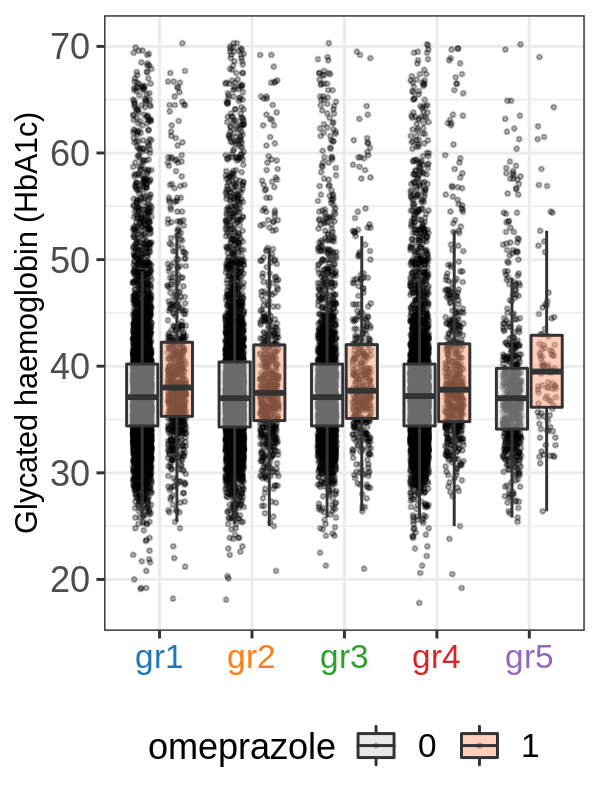

In [6]:
# plot specific treatment response
options(repr.plot.width = 3, repr.plot.height = 4, repr.plot.res = 200)

plot_original_treatresponse <- function(phenoInfo, treatInfo, clust_res, phenoDat, 
                                        phenoOriginal, treatDat, 
                                        pheno_name, treat_name){
    pheno_id <- phenoInfo$pheno_id[phenoInfo$Field == pheno_name]
    treat_id <- treatInfo$pheno_id[treatInfo$Coding_meaning %in% treat_name]
    if(length(treat_id) > 1){
        tmp <- paste0(sapply(treat_id, function(x) strsplit(x, split = '_')[[1]][1]), collapse = '_')
        treat_id <- paste(tmp, strsplit(treat_id[1], split = '_')[[1]][2],sep = '_')              
    }
    print(treat_id)
    print(pheno_id)
    cl <- clust_res$cl_best

    df <- data.frame(id = cl$id, gr = cl$gr, 
                 pheno = phenoDat[match(cl$id, phenoDat$Individual_ID), pheno_id], 
                 pheno_or = phenoOriginal[match(cl$id, paste0('X',phenoOriginal$new_userId)), paste0('x', pheno_id, '_0_0')],
                 treat = treatDat[match(cl$id, treatDat$Individual_ID), paste0('p', treat_id)])

    df$gr <- paste0('gr',df$gr)
    df$gr <- factor(df$gr, levels = paste0('gr', sort(unique(cl$gr))))
    df$treat <- factor(df$treat)
    # remove NA values:
    df <- df[!is.na(df$treat) & !is.na(df$pheno),]
    gr_color <- pal_d3(palette = 'category20')(length(unique(df$gr)))
    ymin <- min(df$pheno_or)
    ymax <- quantile(df$pheno_or, probs = 0.98)
                             
    pl_box_original <-  ggplot(df, aes(x = gr, y = pheno_or, fill = treat))+
      geom_point(size = 0.5, alpha = 0.3, position = position_jitterdodge())+  
      geom_boxplot(outlier.shape = NA, alpha = 0.5)+
      theme_bw()+ 
      ylim(ymin,ymax)+
      ylab(pheno_name)+
      theme(legend.position = 'bottom', legend.title = element_text(size = 13), legend.text = element_text(size = 12), 
        plot.title = element_text(size=12), axis.title.x = element_blank(),
        axis.text.x = element_text(size = 12, angle = 0, hjust = 0.5, colour = gr_color), axis.text.y = element_text(size = 13))+
     scale_fill_manual(name = treat_name,values=c('lightgrey', 'lightsalmon1'))

    pl_box <-  ggplot(df, aes(x = gr, y = pheno, fill = treat))+
      geom_point(size = 0.5, alpha = 0.3, position = position_jitterdodge())+  
      geom_boxplot(outlier.shape = NA, alpha = 0.5)+
      theme_bw()+ 
      ylab(pheno_name)+
      theme(legend.position = 'bottom', legend.title = element_text(size = 13), legend.text = element_text(size = 12), 
        plot.title = element_text(size=12), axis.title.x = element_blank(),
        axis.text.x = element_text(size = 12, angle = 0, hjust = 0.5, colour = gr_color), axis.text.y = element_text(size = 13))+
     scale_fill_manual(name = treat_name,values=c('lightgrey', 'lightsalmon1'))

    return(list(original = pl_box_original, converted = pl_box))

}
                             

pl1 <-  plot_original_treatresponse(phenoInfo, treatInfo, cl_res, phenoDat, 
                                        phenoOriginal, treatDat, 
                                        pheno_name, treat_name)
pl1$original
#pl1$converted                             
ggsave(filename = sprintf('%soriginalPheno_%s_treat%s.pdf', pathSEA_fold,  pheno_name, treat_name), 
       plot = pl1$original, width = 3, height = 4)

   
    down-reg pathways up-reg pathways
  1                 0             233
  2                 0               2
  3               158               0
  4                62               0
  5                 0             233

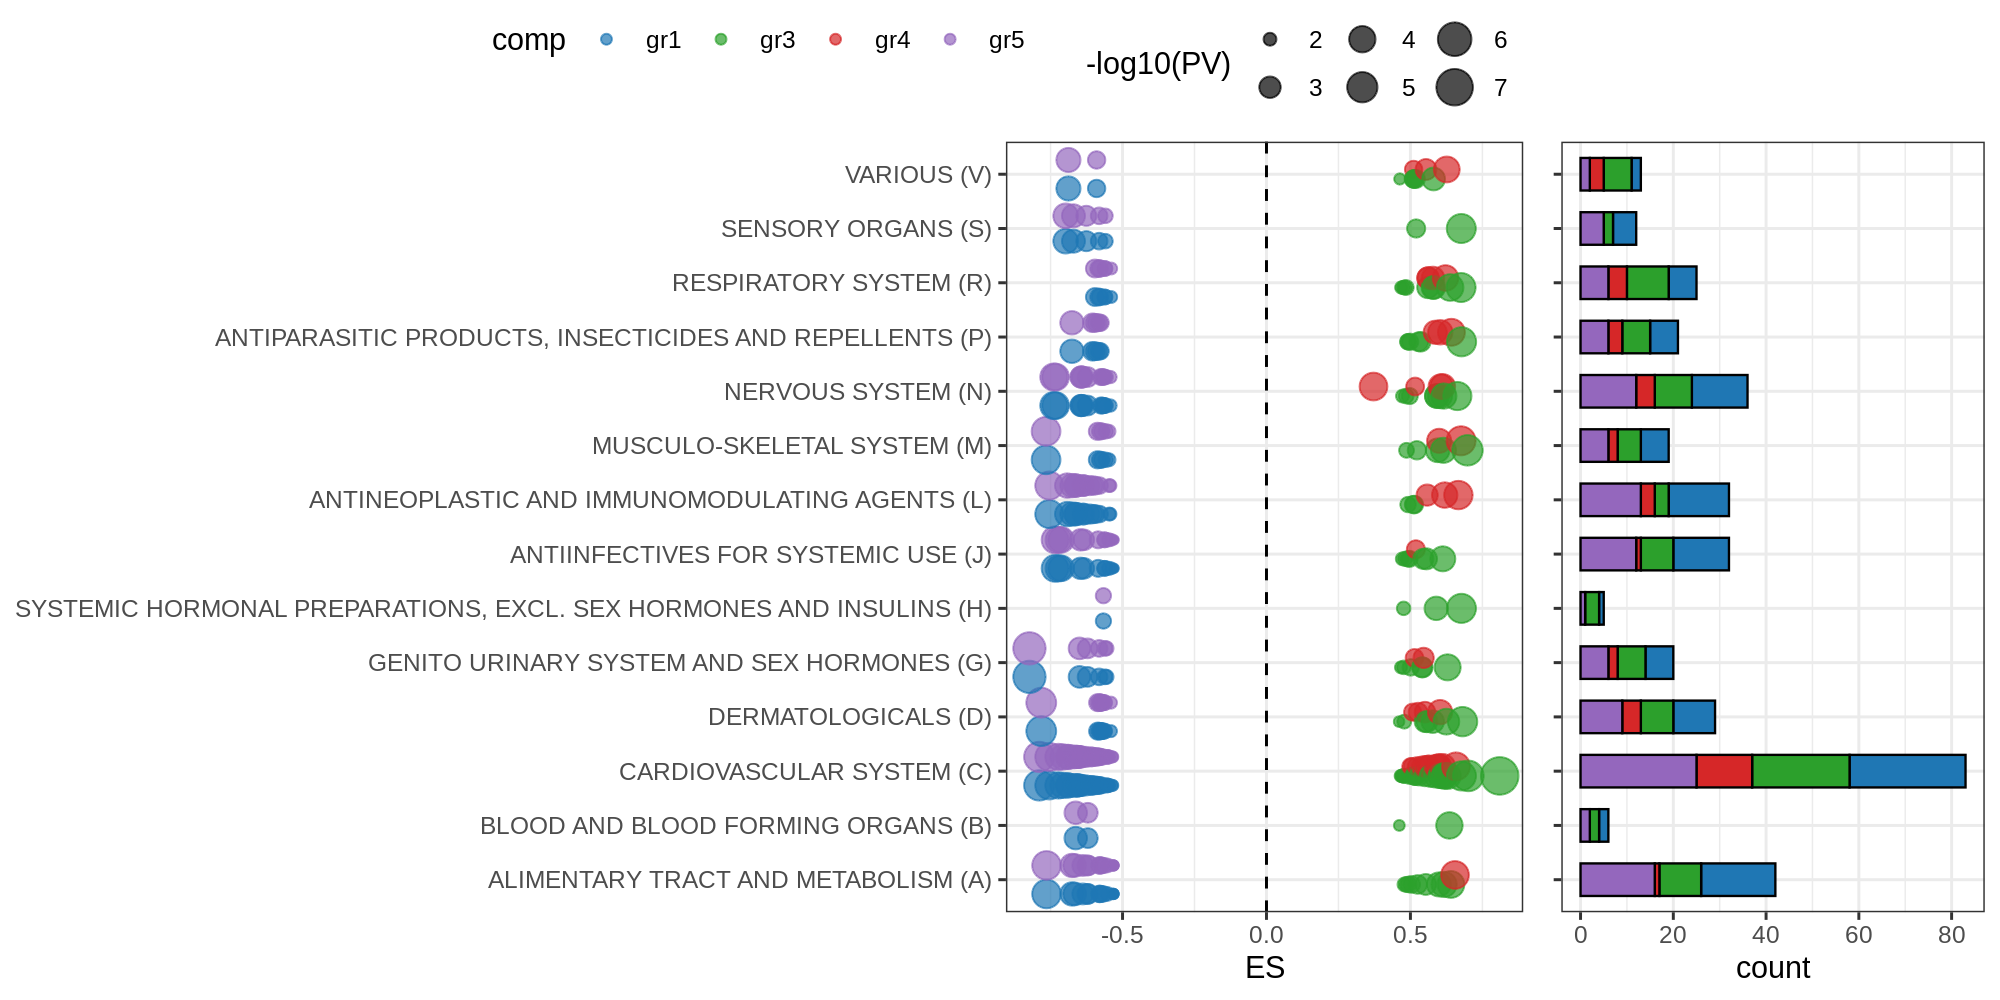

In [8]:
# plot general pathSEA
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)

table(pathSEA$gr, pathSEA$type)
pl <- plot_summary_pathSEA(cl_res, pathSEA)
pl
ggsave(filename = sprintf('%spathSEA_drugNames_summary.pdf', out_fold), 
       plot = pl, width = 10, height = 5)


In [9]:
atc1_names <- na.omit(unique(pathSEA$atc_meaning1))
atc_color <- get_color_atc(atc_codes = atc1_names)

FDR_thr <- 0.01
path_feat <- get(load(pathCluster_file))

gr_res <- get_group_specific_path(path_feat, FDR_thr)
df_names_R <- standardize_pathway_names("Reactome", path_feat$res_pval)
df_names_GO <- standardize_pathway_names("GO", path_feat$res_pval)
    
rpBig <- openRepository(cmap_fold)
Reactome_coll <- loadCollection(rpBig,"C2_CP:REACTOME")
GO_MF_coll <- loadCollection(rpBig,"C5_MF")
GO_BP_coll <- loadCollection(rpBig,"C5_BP")
GO_CC_coll <- loadCollection(rpBig,"C5_CC")

df_collname <- data.frame(
    v1 = c("C2_CP:REACTOME", "C5_MF", "C5_BP", "C5_CC"), 
    v2 = c("Reactome", "GO_MF", "GO_BP", "GO_CC"))

gr_tot <- sort(unique(pathSEA$gr))

# general for each group
dp_gr <- lapply(gr_tot, function(x) 
    get_drug_pathway_df(pathSEA = pathSEA, gr_id = x, keep_na = FALSE))
                
                

Found repo index in "/psycl/g/mpsziller/lucia/refData/Cmap_MSigDB_v6.1_PEPs/R_repo.RDS".



In [10]:
# specific to CAD treatments:
dp_atc_gr <- lapply(gr_tot, function(x) 
    get_drug_pathway_df(pathSEA = pathSEA, gr_id = x, 
                        atc_meaning1 = c("CARDIOVASCULAR SYSTEM", "ALIMENTARY TRACT AND METABOLISM"), 
                        keep_na = FALSE))

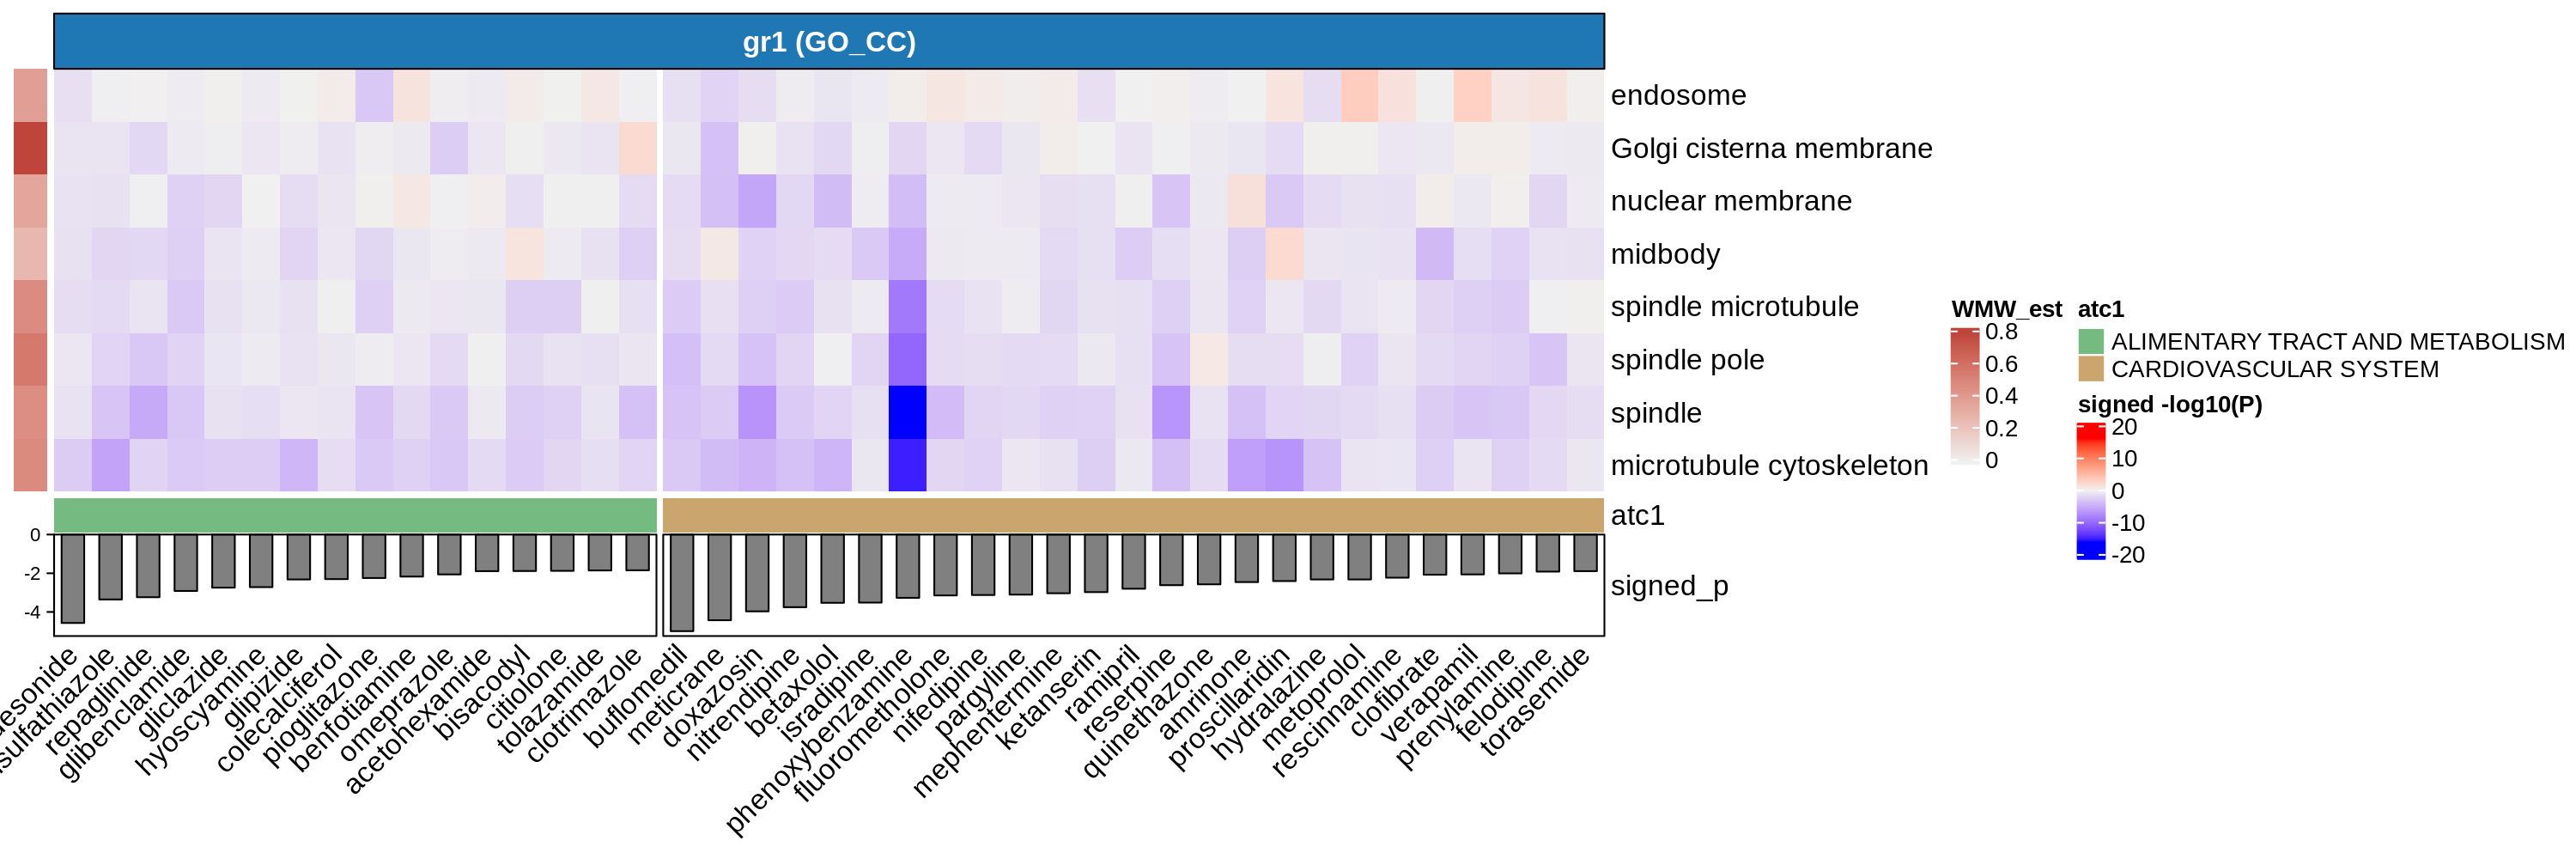

In [14]:
options(repr.plot.width = 15, repr.plot.height = 5, repr.plot.res = 200)
plot_drug_pathway(gr_id = 1, db_id = 1, dp_gr = dp_atc_gr, 
                  pathSEA = pathSEA, gr_res = gr_res, 
                  atc_color = atc_color, 
                  width_plot = 15, height_plot = 5, 
                  outFold = out_fold)

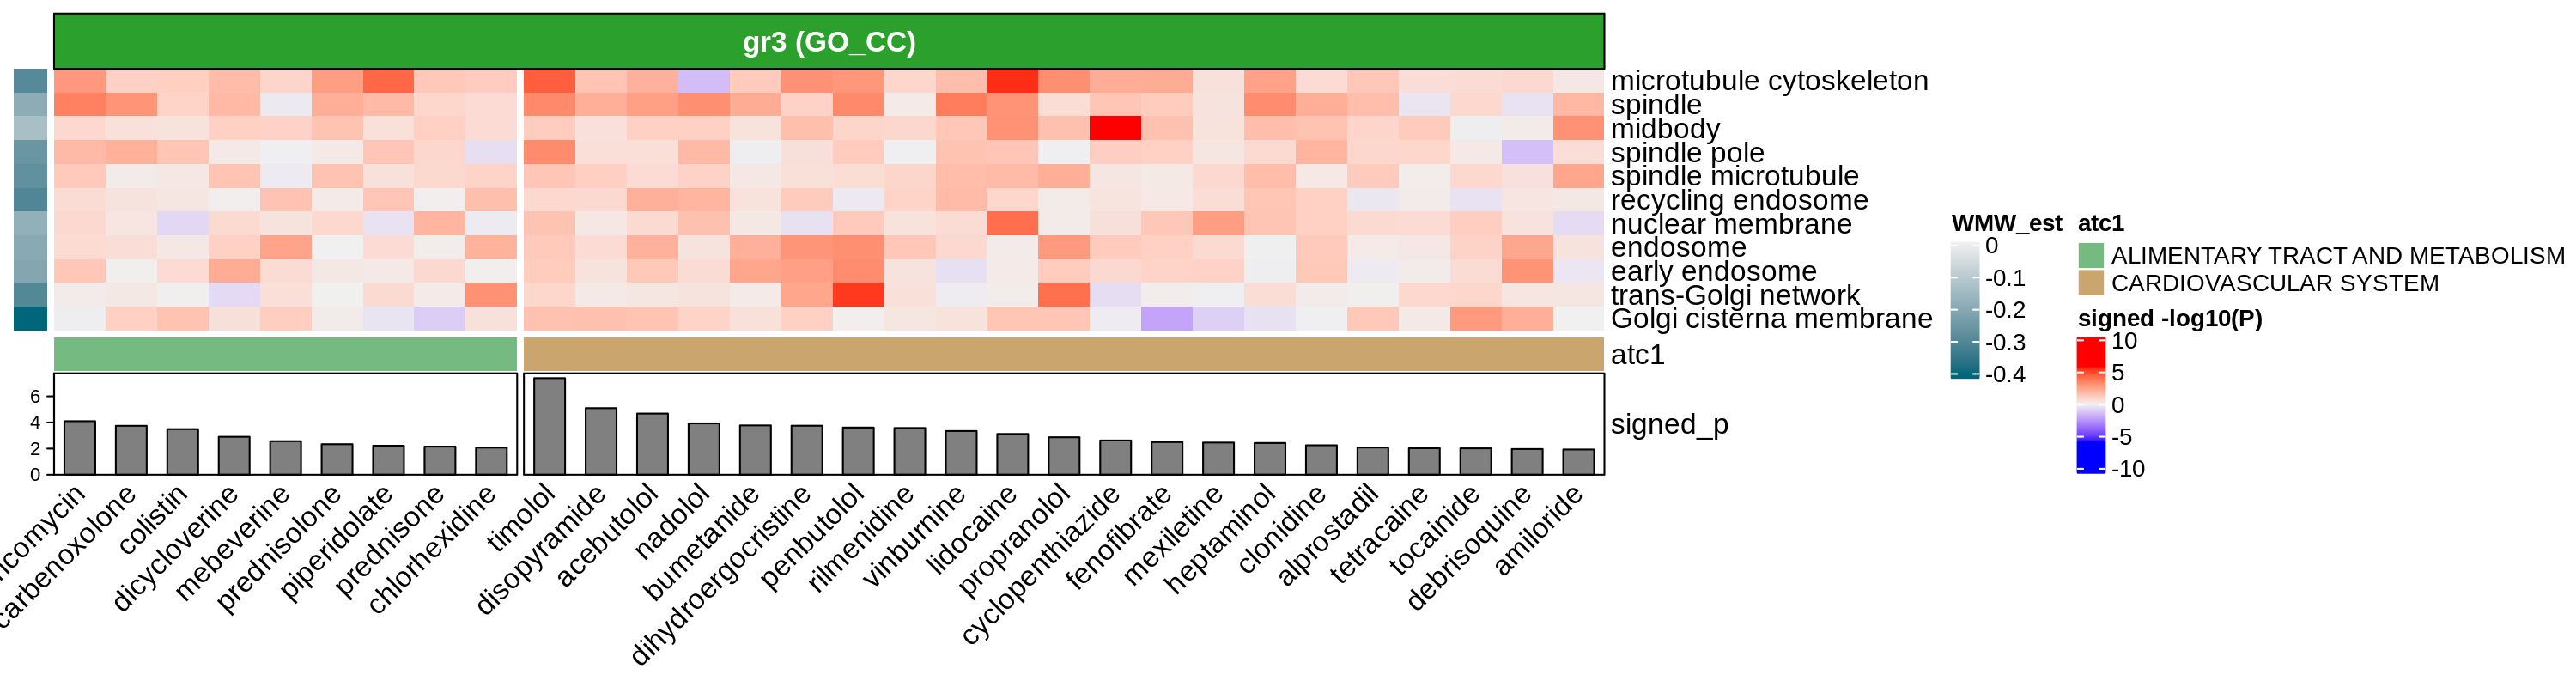

In [15]:
options(repr.plot.width = 15, repr.plot.height = 4, repr.plot.res = 200)
plot_drug_pathway(gr_id = 3, db_id = 1, dp_gr = dp_atc_gr, 
                  pathSEA = pathSEA, gr_res = gr_res, 
                  atc_color = atc_color, 
                  width_plot = 15, height_plot = 4, 
                  outFold = out_fold)

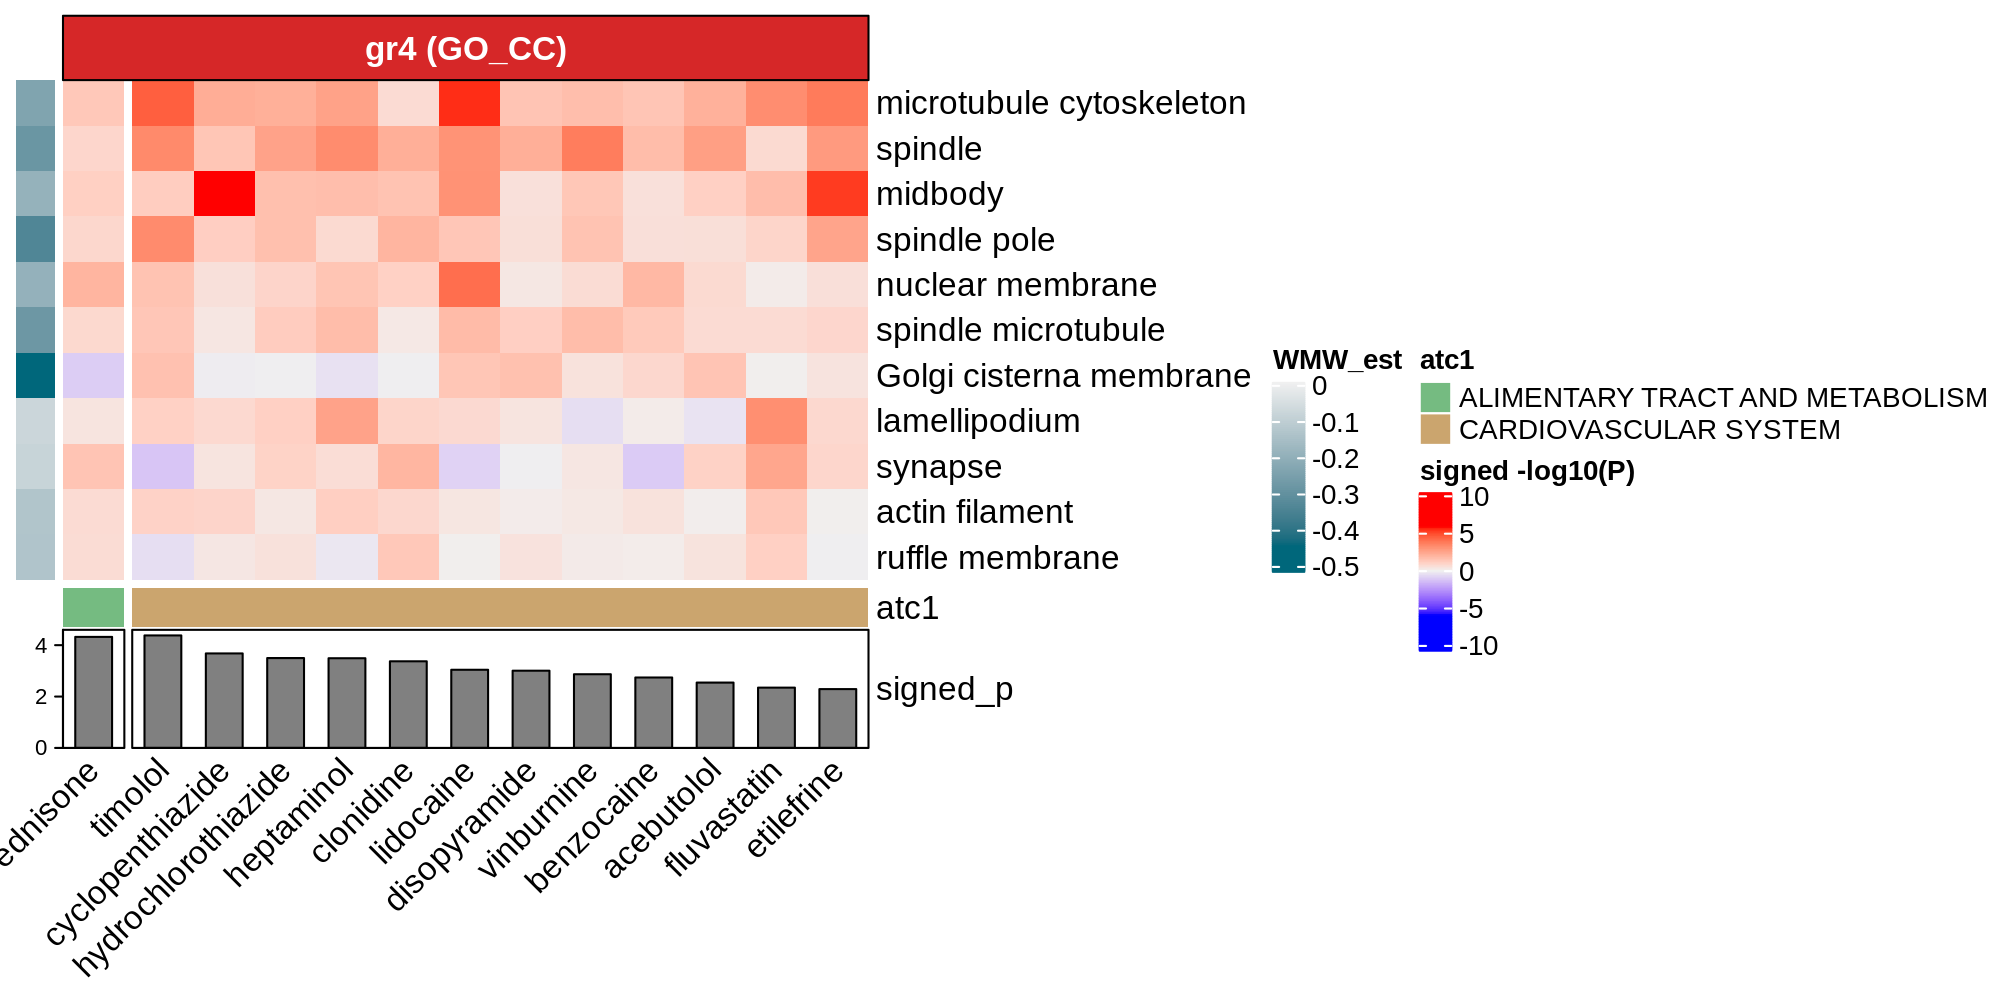

In [16]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
plot_drug_pathway(gr_id = 4, db_id = 1, dp_gr = dp_atc_gr, 
                  pathSEA = pathSEA, gr_res = gr_res, 
                  atc_color = atc_color, 
                  width_plot = 10, height_plot = 5, 
                  outFold = out_fold)

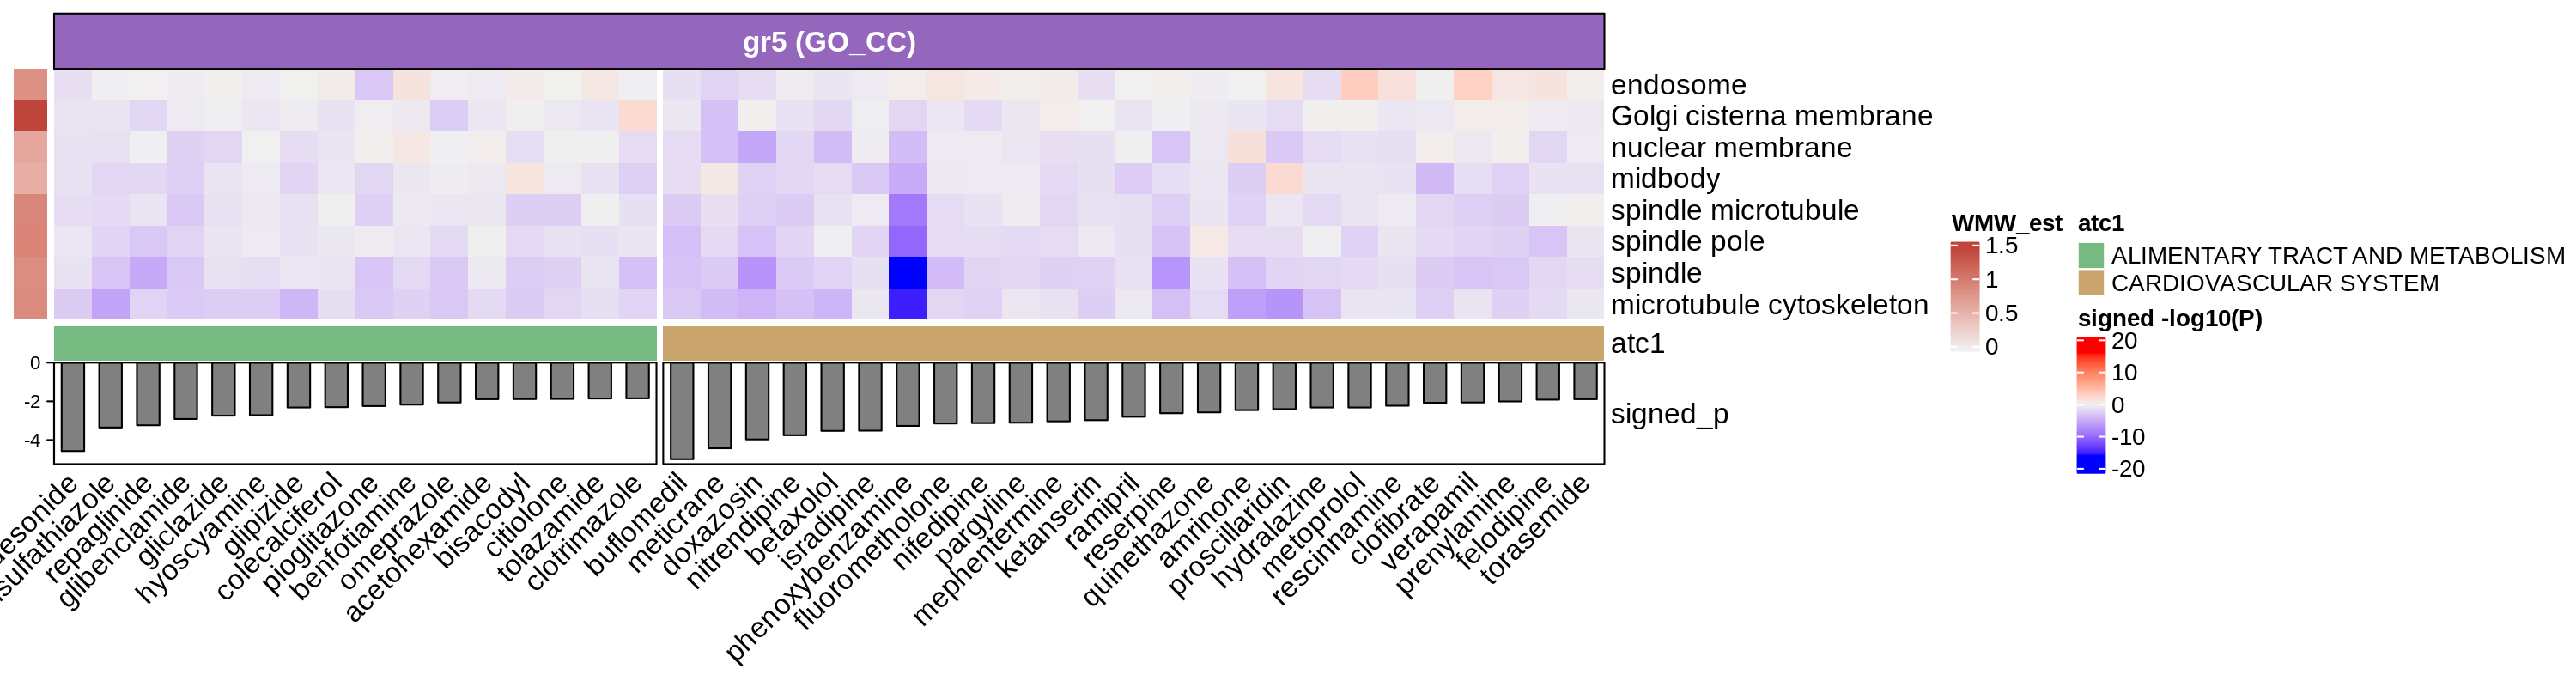

In [17]:
options(repr.plot.width = 15, repr.plot.height = 4, repr.plot.res = 200)
plot_drug_pathway(gr_id = 5, db_id = 1, dp_gr = dp_atc_gr, 
                  pathSEA = pathSEA, gr_res = gr_res, 
                  atc_color = atc_color, 
                  width_plot = 15, height_plot = 4, 
                  outFold = out_fold)